## Foreword & Libraries

This notebook combines the major attempts at data cleaning and processing. During development this was split into smaller notebooks for sake of sharing and creating checkpoints. 

The input and output output may not be in the repository due to its size limit. 

In [78]:
# Importing Dependencies and Setup
# Standard
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, r2_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import randint

## Data Analysis

In [79]:
# Load CSV file and turn it into PD DataFrames
flight_df = pd.read_csv("Resources/Combined_Flights_2022.csv")

In [80]:
flight_df.FlightDate.sort_values()


3352803    2022-01-01
3084349    2022-01-01
3084350    2022-01-01
3084351    2022-01-01
3084352    2022-01-01
              ...    
1460616    2022-07-31
1397041    2022-07-31
1678994    2022-07-31
1513102    2022-07-31
1377864    2022-07-31
Name: FlightDate, Length: 4078318, dtype: object

In [81]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [82]:
flight_df.FlightDate = pd.to_datetime(flight_df.FlightDate)

In [83]:
flight_df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078313,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,...,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
4078314,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
4078315,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,...,2337.0,52.0,7.0,1838,381.0,1.0,12.0,1800-1859,3,0
4078316,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,...,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1


In [84]:
columns = flight_df.columns
print(columns)


Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [85]:
flight_df.Airline.unique()

array(['Commutair Aka Champlain Enterprises, Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Mesa Airlines Inc.',
       'Southwest Airlines Co.', 'Republic Airlines', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Capital Cargo International',
       'SkyWest Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'Comair Inc.', 'Horizon Air', 'United Air Lines Inc.'],
      dtype=object)

In [86]:
flight_df.FlightDate.count()
# pd.set_option('display.max_columns', None)
# pd.reset_option('^display.', silent=True)

4078318

For flight status prediction we would need to suspend all data that comes post take-off. 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepTime',  'AirTime', 'ActualElapsedTime'

'CRSElapsedTime' has no null values but may act as target variable, same as 'DepDelay'. 

In [87]:
flight_df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

## Data Cleaning

In [88]:
df = flight_df.copy()
df.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
4078313,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,...,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
4078314,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
4078315,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,...,2337.0,52.0,7.0,1838,381.0,1.0,12.0,1800-1859,3,0
4078316,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,...,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1
4078317,2022-03-07,Republic Airlines,EWR,RDU,False,True,1154,1148.0,0.0,-6.0,...,1201.0,1552.0,4.0,1333,NaN,NaN,NaN,1300-1359,2,1


In [89]:
# Dropping Unnecssary Columns
# Need to be careful as certain columns will provide target variable, but some will overlap in their role of being a target variable
# Anything relating to data post take-off  

df.drop(['DepTime',  'AirTime', 'ActualElapsedTime', 'ArrTime', 'DepDelay',
       'DepDelayMinutes', 'ArrDelayMinutes', 
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings'], axis = 1, inplace=True)


In [90]:
# Verifying Relationship between "Cancelled" and "DepDel15" column; checking to see if a cancelled flight produces a null value for DepDel15
df.loc[df["DepDel15"].isna()].drop(columns = ['Diverted', 'CRSDepTime', 'CRSElapsedTime', 
'Origin', 'Dest', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']).head(10)

,FlightDate,Airline,Cancelled,DepDel15,CRSArrTime
949,2022-04-02,"Commutair Aka Champlain Enterprises, Inc.",True,NaN,2031
970,2022-04-02,"Commutair Aka Champlain Enterprises, Inc.",True,NaN,1757
982,2022-04-02,"Commutair Aka Champlain Enterprises, Inc.",True,NaN,1611
1001,2022-04-02,"Commutair Aka Champlain Enterprises, Inc.",True,NaN,1855
1451,2022-04-01,"GoJet Airlines, LLC d/b/a United Express",True,NaN,824
1788,2022-04-01,Air Wisconsin Airlines Corp,True,NaN,1522
1844,2022-04-01,Southwest Airlines Co.,True,NaN,1550
1881,2022-04-01,Southwest Airlines Co.,True,NaN,1825
1903,2022-04-01,Southwest Airlines Co.,True,NaN,2000
1932,2022-04-01,Southwest Airlines Co.,True,NaN,1205


In [91]:
# DepDel15 has null values when a flight is cancelled, we'll set to 0 for now
df.DepDel15.fillna(0, inplace=True)

In [92]:
# Viewing the columns and counts
print(df.columns)
print(df.count())
df.info()

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'DepDel15', 'CRSArrTime'],
      dtype='object')
FlightDate        4078318
Airline           4078318
Origin            4078318
Dest              4078318
Cancelled         4078318
Diverted          4078318
CRSDepTime        4078318
CRSElapsedTime    4078318
Distance          4078318
Year              4078318
Quarter           4078318
Month             4078318
DayofMonth        4078318
DayOfWeek         4078318
DepDel15          4078318
CRSArrTime        4078318
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FlightDate      datetime64[ns]
 1   Airline         object        
 2   Origin          object        
 3   Dest            object        
 4   

In [93]:
# Exporing our cleaned DataFrame as a CSV
# from pathlib import Path  
# filepath = Path('Resources\Flight_2022_Cleaned.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df.to_csv(filepath, index=False) 

## Data Pre-processing

### Reducing Dimensionality

In [94]:
# Reviewing DataFrame
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DepDel15,CRSArrTime
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,72.0,212.0,2022,2,4,4,1,0.0,1245
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,77.0,295.0,2022,2,4,4,1,0.0,849
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,70.0,251.0,2022,2,4,4,1,0.0,1639
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,90.0,376.0,2022,2,4,4,1,0.0,1605
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,70.0,251.0,2022,2,4,4,1,0.0,1245


In [95]:
# Viewing airline value_counts to determine binning
df.Airline.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
airline_count = df.Airline.value_counts()
print(airline_count)

Southwest Airlines Co.                       731925
Delta Air Lines Inc.                         512114
American Airlines Inc.                       495953
SkyWest Airlines Inc.                        440807
United Air Lines Inc.                        352009
Republic Airlines                            197881
JetBlue Airways                              156793
Envoy Air                                    150758
Endeavor Air Inc.                            142624
Comair Inc.                                  135884
Alaska Airlines Inc.                         129510
Spirit Air Lines                             129208
Frontier Airlines Inc.                        86557
Allegiant Air                                 73504
Mesa Airlines Inc.                            71972
Horizon Air                                   56320
Capital Cargo International                   52827
Commutair Aka Champlain Enterprises, Inc.     44367
Hawaiian Airlines Inc.                        42212
Air Wisconsi

In [96]:
# Categorical binning of airlines
airline_group = list(airline_count[airline_count<150000].index)

for airline in airline_group:
    df['Airline'] = df['Airline'].replace(airline,"Other")

# Check to make sure binning was successful
df.Airline.value_counts()

Other                     1040078
Southwest Airlines Co.     731925
Delta Air Lines Inc.       512114
American Airlines Inc.     495953
SkyWest Airlines Inc.      440807
United Air Lines Inc.      352009
Republic Airlines          197881
JetBlue Airways            156793
Envoy Air                  150758
Name: Airline, dtype: int64

In [97]:
# Dropping Origin, Dest as they have too many nuniques; could possibly bin major categories
df.drop(['Origin', 'Dest'], 1, inplace=True)

# Turning 'FlightDate' from an object to int via unix
df['FlightDate'] = pd.to_numeric(pd.to_datetime(df['FlightDate']))

# Review changes to the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FlightDate      int64  
 1   Airline         object 
 2   Cancelled       bool   
 3   Diverted        bool   
 4   CRSDepTime      int64  
 5   CRSElapsedTime  float64
 6   Distance        float64
 7   Year            int64  
 8   Quarter         int64  
 9   Month           int64  
 10  DayofMonth      int64  
 11  DayOfWeek       int64  
 12  DepDel15        float64
 13  CRSArrTime      int64  
dtypes: bool(2), float64(3), int64(8), object(1)
memory usage: 381.2+ MB


C:\Users\aldod\AppData\Local\Temp\ipykernel_24768\3118732200.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Origin', 'Dest'], 1, inplace=True)


### Creating Target Variable Column

In [98]:
# Reviewing DataFrame
df.head()

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DepDel15,CRSArrTime
0,1649030400000000000,Other,False,False,1133,72.0,212.0,2022,2,4,4,1,0.0,1245
1,1649030400000000000,Other,False,False,732,77.0,295.0,2022,2,4,4,1,0.0,849
2,1649030400000000000,Other,False,False,1529,70.0,251.0,2022,2,4,4,1,0.0,1639
3,1649030400000000000,Other,False,False,1435,90.0,376.0,2022,2,4,4,1,0.0,1605
4,1649030400000000000,Other,False,False,1135,70.0,251.0,2022,2,4,4,1,0.0,1245


In [99]:
# Converting DepDel15 to a boolean; for this model we only need to know if the flight is delayed, not the severity.
df['DepDel15'] = df['DepDel15'].astype(bool)
df.head()

,FlightDate,Airline,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DepDel15,CRSArrTime
0,1649030400000000000,Other,False,False,1133,72.0,212.0,2022,2,4,4,1,False,1245
1,1649030400000000000,Other,False,False,732,77.0,295.0,2022,2,4,4,1,False,849
2,1649030400000000000,Other,False,False,1529,70.0,251.0,2022,2,4,4,1,False,1639
3,1649030400000000000,Other,False,False,1435,90.0,376.0,2022,2,4,4,1,False,1605
4,1649030400000000000,Other,False,False,1135,70.0,251.0,2022,2,4,4,1,False,1245


In [100]:
# Create a single target variable column with flight status
# Create new column 'Status', write "Cancelled" Cancelled = True,
# Else write "Delayed" if 'DepDel15' is True,
# Else write "On_Time"
df['Status'] = df.apply(lambda row: 'Cancelled' if row['Cancelled'] and not row['DepDel15']
                                           else 'Delayed' if not row['Cancelled'] and row['DepDel15']
                                           else 'On_Time', axis=1)

# Factorize the status column, turning it into a numerical value
df['Status_Fact'], unique_labels = pd.factorize(df['Status'])

In [101]:
# Verifying factorization
print(df.Status_Fact.value_counts() )
print(df.Status.value_counts())

0    3093528
1     863117
2     121673
Name: Status_Fact, dtype: int64
On_Time      3093528
Delayed       863117
Cancelled     121673
Name: Status, dtype: int64


### Splitting, Encoding Airlines

In [102]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df['Status_Fact']


# Separate the X variable, the features
X = df.drop(columns=['Cancelled', 'DepDel15', 'Status', 'Status_Fact'])

In [103]:
# Encoding Airlines

# Generate a list of the columns with object datatypes
X_cat = X.dtypes[X.dtypes == "object"].index.tolist()
X_cat

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(X[X_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(X_cat)
encode_df.head()

c:\Users\aldod\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Airline_American Airlines Inc.,Airline_Delta Air Lines Inc.,Airline_Envoy Air,Airline_JetBlue Airways,Airline_Other,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_United Air Lines Inc.
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [104]:
# Merge encoded columns back to X variable
X = X.merge(encode_df,left_index=True, right_index=True)
X = X.drop(X_cat, 1)

# Review feature DataFrame
X.head()

C:\Users\aldod\AppData\Local\Temp\ipykernel_24768\1631987028.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(X_cat, 1)


,FlightDate,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSArrTime,Airline_American Airlines Inc.,Airline_Delta Air Lines Inc.,Airline_Envoy Air,Airline_JetBlue Airways,Airline_Other,Airline_Republic Airlines,Airline_SkyWest Airlines Inc.,Airline_Southwest Airlines Co.,Airline_United Air Lines Inc.
0,1649030400000000000,False,1133,72.0,212.0,2022,2,4,4,1,1245,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1649030400000000000,False,732,77.0,295.0,2022,2,4,4,1,849,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1649030400000000000,False,1529,70.0,251.0,2022,2,4,4,1,1639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1649030400000000000,False,1435,90.0,376.0,2022,2,4,4,1,1605,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1649030400000000000,False,1135,70.0,251.0,2022,2,4,4,1,1245,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
X.count()

FlightDate                        4078318
Diverted                          4078318
CRSDepTime                        4078318
CRSElapsedTime                    4078318
Distance                          4078318
Year                              4078318
Quarter                           4078318
Month                             4078318
DayofMonth                        4078318
DayOfWeek                         4078318
CRSArrTime                        4078318
Airline_American Airlines Inc.    4078318
Airline_Delta Air Lines Inc.      4078318
Airline_Envoy Air                 4078318
Airline_JetBlue Airways           4078318
Airline_Other                     4078318
Airline_Republic Airlines         4078318
Airline_SkyWest Airlines Inc.     4078318
Airline_Southwest Airlines Co.    4078318
Airline_United Air Lines Inc.     4078318
dtype: int64

### Training Baseline Model

In [106]:
# Split the preprocessed data into a training and testing dataset.
# Test taking up 20% of our dataset, stratify data so it's equally distributed across the two sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [107]:
rfBase_model = RandomForestClassifier(random_state = 1, n_jobs = 8)
rfBase_model.fit(X_train, y_train)

rfBase_y_pred = rfBase_model.predict(X_test)

In [108]:
# Print the balanced_accuracy score of the model
accu_score = balanced_accuracy_score(y_test, rfBase_y_pred)
c_matrix = confusion_matrix(y_test, rfBase_y_pred)

print(accu_score)
print(c_matrix)

0.42900277261164216
[[580889  35408   2409]
 [132044  38921   1658]
 [ 16761   4589   2985]]


In [110]:
target_names = ['On_Time', 'Delayed', 'Cancelled']
print(classification_report(y_test, rfBase_y_pred, target_names=target_names))

              precision    recall  f1-score   support

     On_Time       0.80      0.94      0.86    618706
     Delayed       0.49      0.23      0.31    172623
   Cancelled       0.42      0.12      0.19     24335

    accuracy                           0.76    815664
   macro avg       0.57      0.43      0.45    815664
weighted avg       0.72      0.76      0.72    815664



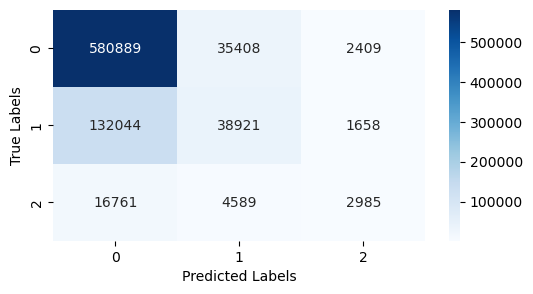

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, r2_score
from sklearn import metrics
plt.figure(figsize = (6,3))
sns.heatmap(metrics.confusion_matrix(y_test, rfBase_y_pred), annot = True, cmap = 'Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()